In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [26]:
# !pip install matplotlib
!pip install tqdm

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [31]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
# wotransform = transforms.Compose([transforms.ToTensor()])
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

# trainset_norm = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9607843..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.84313726..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..0.8352941].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.99215686].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9764706].


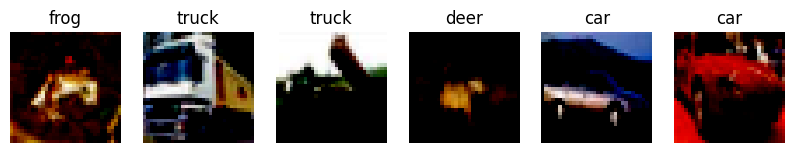

In [5]:
fig, axis = plt.subplots(1,6, figsize=(10,10))
for idx, ax in enumerate(axis):
    ax.axis('off')
    ax.set_title(classes[trainset[idx][1]])
    ax.imshow(np.asarray(trainset[idx][0]).transpose(1,2,0))
plt.show()

In [84]:
# trainset_norm[0]

In [88]:
# fig, axis = plt.subplots(1,6, figsize=(10,10))
# for idx, ax in enumerate(axis):
#     ax.axis('off')
#     ax.set_title(classes[trainset_norm[idx][1]])
#     ax.imshow(trainset_norm[idx][0].permute(1,2,0))
# plt.show()

In [7]:
# plt.scatter(y=np.asarray(trainset[0][0]).reshape(-1), x=range(3072))
# np.asarray(trainset[0][0]).reshape(-1).shape

In [6]:
# plt.scatter(y=np.asarray(trainset_norm[0][0]).reshape(-1), x=range(3072))

In [21]:
import torch.nn as nn

class s_mlp(nn.Module):

    def __init__(self, in_col, out_col):
        super().__init__()
        self.first_linear = nn.Linear(in_col, 4096)
        self.second_linear = nn.Linear(4096, out_col)

    def forward(self, x):

        x = self.first_linear(x)
        x = self.second_linear(x)

        return x

In [22]:
model = s_mlp(3072, 8)

In [62]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [61]:
img = iter(trainloader)
# next(img)
# next(img)
# next(img)
img_data = next(img)
img_data[0].shape

torch.Size([4, 3, 32, 32])

In [ ]:
for epoch in range(2):
    
    for data,label in trainloader:
        b, _, _, _ = data.size()
    
        data = data.view(b, -1)
        label = label.view(-1).float()

        optimizer.zero_grad()
        x = model(data)

        # print(x)
        preds = torch.max(x, dim=1)[0]
        
        # print(preds)
        loss = loss_fn(preds, label)
        
        loss.backward()
        optimizer.step()
        

    
    